In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [30]:
import re
import matplotlib.pyplot as plt

text = "This $string is an $example"
[word for word in text.split() if word.startswith('$') or word.startswith('@')]


['$string', '$example']

In [25]:
import pandas as pd
import numpy as np

df=pd.read_excel("preprocesedfile______V1.xlsx")
df.columns=['i','Tweet','1','2','3','4','5','6','7','8','9','10','11','12']        
X=df['Tweet']

df.head()

,i,Tweet,1,2,3,4,5,6,7,8,9,10,11,12
0,0,#MavalLokSabha #_ #loksabha\n#ParthForMaval #...,neutral,# MavalLokSabha # _ # loksabha\n#ParthForMav...,0.0,0.0,1.0,0.0,1,1,1,0,0,0
1,1,# # #Loksabha Election Pune,neutral,# # # Loksabha Election Pune,0.0,0.0,1.0,0.0,2,0,0,0,0,0
2,2,\n#MavalLokSabha #_ #loksabha\n#ParthForMaval...,neutral,\n#MavalLokSabha # _ # loksabha\n#ParthForMa...,0.0,0.0,1.0,0.0,3,0,0,0,0,0
3,3,3 UP \n#Thirdphaseofvoting #NarendraM...,neutral,3 UP \n#Thirdphaseofvoting # Narend...,0.0,0.0,1.0,0.0,0,0,1,0,0,0
4,4,Mat Bhool\n#loksabha elections\n#baramatiloksa...,neutral,Mat Bhool\n#loksabha elections\n#baramatiloksa...,0.0,0.0,1.0,0.0,3,2,1,0,0,0


In [31]:
processed_tweets=[]
for tweet in range(0, len(X)):  
    #print (str(X[tweet]))
    #print ("\n\n")
    #[word for word in str(X[tweet]).split() if word.startswith('#') or word.startswith('@')]
    processed_tweet=[]
    for word in str(X[tweet]).split():        
        if word.startswith('#'):
            processed_tweet.append(word)
    processed_tweets.append(' '.join(processed_tweet))    
print (len(processed_tweets))
print (processed_tweets)
df['processed_hashtags']=processed_tweets

2520
['#MavalLokSabha #_ #loksabha\\n#ParthForMaval #VotingRound3 #VoteKar', '# # #Loksabha', '#_ #loksabha\\n#ParthForMaval #VotingRound3 #VoteKar', '#NarendraModi #BJP #Congress', '', '#AAP #LokSabha #Delhi #LokSabhaElections2019 #SignatureBridge\\nPhoto', '', '', '', '#ElectionsWithPK #LokSabhaElections2019', '#Votinground3 #BattleOf2019 #Phase3 #Trivandrum #Kerala', '#Bhopal #VotingRound3 #Phase3', '', '#LokSabhaElections2019 #Phase3 #VotingRound3', '#PhirEkBaarModiSarkar', '', '#Delhi #LokSabhaElections2019', '#GetInked #LokSabhaElections2019', '', '#', '#Odisha', '', '#LokSabhaElections2019', '#', '', '#LokSabhaElections2019', '#Phase3 #LokSabhaElections2019\\n #ReporterDiary', '#LokSabhaElections2019 #OdishaElections2019', '#NewIndia', '#VoteKar #LokSabhaElections2019 #AayegaToModiHi', '#VoteKar', '#Chowkidar #LokSabhaElections2019 #UditRaj', '#Gujarat\\nPatan #GujaratElections2019 #TV9News', '#LokSabhaElections2019', '#AayegaToModiHi #LokSabhaElections2019\\nToday', '', '#LokSa

In [26]:
df

,i,Tweet,1,2,3,4,5,6,7,8,9,10,11,12
0,0,#MavalLokSabha #_ #loksabha\n#ParthForMaval #...,neutral,# MavalLokSabha # _ # loksabha\n#ParthForMav...,0.000,0.000,1.000,0.0000,1,1,1,0,0,0
1,1,# # #Loksabha Election Pune,neutral,# # # Loksabha Election Pune,0.000,0.000,1.000,0.0000,2,0,0,0,0,0
2,2,\n#MavalLokSabha #_ #loksabha\n#ParthForMaval...,neutral,\n#MavalLokSabha # _ # loksabha\n#ParthForMa...,0.000,0.000,1.000,0.0000,3,0,0,0,0,0
3,3,3 UP \n#Thirdphaseofvoting #NarendraM...,neutral,3 UP \n#Thirdphaseofvoting # Narend...,0.000,0.000,1.000,0.0000,0,0,1,0,0,0
4,4,Mat Bhool\n#loksabha elections\n#baramatiloksa...,neutral,Mat Bhool\n#loksabha elections\n#baramatiloksa...,0.000,0.000,1.000,0.0000,3,2,1,0,0,0
5,5,#AAP #LokSabha candidate from North East #Delh...,neutral,# AAP # LokSabha candidate North East # Delhi ...,0.000,0.000,1.000,0.0000,3,0,3,0,0,1
6,6,\n \n#LokSabhaElections2019,neutral,\n \n#LokSabhaElections2019,0.000,0.000,1.000,0.0000,0,0,1,0,0,0
7,7,350 EVM \n\n \n\n@BJP4...,antigovt,350 EVM \n\n \n\n@B...,0.000,0.000,1.000,0.0000,1,0,1,1,0,1
8,8,Hahahaha Congress leaders dont trust even thei...,progovt,Hahahaha Congress leaders nt trust families vo...,0.000,0.320,0.680,0.5106,2,0,2,0,1,0
9,9,#ElectionsWithPK \n 3 \n\n#AbkiBaarKiskiS...,neutral,# ElectionsWithPK \n 3 \n\n#AbkiBaarKisk...,0.000,0.000,1.000,0.0000,2,0,0,0,0,1


In [27]:
process_tweets=[]
for tweet in range(0, len(X)):  
    #print (str(X[tweet]))
    #print ("\n\n")
    #[word for word in str(X[tweet]).split() if word.startswith('#') or word.startswith('@')]
    process_tweet=[]
    for word in str(X[tweet]).split():        
        if word.startswith('@'):
            process_tweet.append(word)
    process_tweets.append(' '.join(process_tweet))    
print (len(process_tweets))
df['Processed_mentions']=process_tweets
df

2520


,i,Tweet,1,2,3,4,5,6,7,8,9,10,11,12,Processed_mentions
0,0,#MavalLokSabha #_ #loksabha\n#ParthForMaval #...,neutral,# MavalLokSabha # _ # loksabha\n#ParthForMav...,0.000,0.000,1.000,0.0000,1,1,1,0,0,0,
1,1,# # #Loksabha Election Pune,neutral,# # # Loksabha Election Pune,0.000,0.000,1.000,0.0000,2,0,0,0,0,0,
2,2,\n#MavalLokSabha #_ #loksabha\n#ParthForMaval...,neutral,\n#MavalLokSabha # _ # loksabha\n#ParthForMa...,0.000,0.000,1.000,0.0000,3,0,0,0,0,0,
3,3,3 UP \n#Thirdphaseofvoting #NarendraM...,neutral,3 UP \n#Thirdphaseofvoting # Narend...,0.000,0.000,1.000,0.0000,0,0,1,0,0,0,
4,4,Mat Bhool\n#loksabha elections\n#baramatiloksa...,neutral,Mat Bhool\n#loksabha elections\n#baramatiloksa...,0.000,0.000,1.000,0.0000,3,2,1,0,0,0,
5,5,#AAP #LokSabha candidate from North East #Delh...,neutral,# AAP # LokSabha candidate North East # Delhi ...,0.000,0.000,1.000,0.0000,3,0,3,0,0,1,@ANINDYAtimes
6,6,\n \n#LokSabhaElections2019,neutral,\n \n#LokSabhaElections2019,0.000,0.000,1.000,0.0000,0,0,1,0,0,0,
7,7,350 EVM \n\n \n\n@BJP4...,antigovt,350 EVM \n\n \n\n@B...,0.000,0.000,1.000,0.0000,1,0,1,1,0,1,@BJPsoldIndia @ECISVEEP @SanjayAzadSln @RahulG...
8,8,Hahahaha Congress leaders dont trust even thei...,progovt,Hahahaha Congress leaders nt trust families vo...,0.000,0.320,0.680,0.5106,2,0,2,0,1,0,
9,9,#ElectionsWithPK \n 3 \n\n#AbkiBaarKiskiS...,neutral,# ElectionsWithPK \n 3 \n\n#AbkiBaarKisk...,0.000,0.000,1.000,0.0000,2,0,0,0,0,1,


1,,opinion,progovt,joy

2,,opinion,antigovt,sadness

3,,opinion,progovt,satisfaction

4,@narendramodi @sureshpprabhu,general,progovt,surprise

5,,general,neutral,neutral

6,@ajaydevgn @narendramodi @ravikishann @nirahua1 @manojtiwarimp,opinion,neutral,anxiety

7,@narendramodi,neutral,neutral,neutral

8,@vanitajain21 @sandeepfromvns @mini_707070,opinion,progovt,surprise

9,@bjp4india @narendramodi @incindia @pawankhera @sambitswaraj,general,progovt,satisfaction

10,@narendramodi,general,neutral,neutral

11,,neutral,neutral,neutral

12,@duomodimilano @3bmeteo @beautyfromitaly,neutral,neutral,neutral

13,@narendramodi @zeenews,neutral,neutral,neutral

14,,neutral,neutral,neutral

15,,opinion,progovt,satisfaction

16,@narendramodi,neutral,neutral,neutral

17,,general,neutral,neutral

18,@sanjaynirupam,neutral,neutral,neutral

19,@mamataofficial @ecisveep @narendramodi,opinion,progovt,joy

20,,opinion,progovt,joy

21,,neutral,neutral,neutral

22,@dev_fadnavis,neutral,neutral,neutral

23,@mo

KeyError: 251

In [28]:
#s Freq

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=df['processed_hashtags'].astype('U')
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:len(df)])

[('apnamodiaayega', 225), ('deshkishaanmodi', 102), ('sabsebadajhootamodi', 98), ('loksabhaelections2019', 93), ('deshkagauravmodi', 65), ('modilies', 55), ('modihiaayega', 44), ('modi', 36), ('phirekbaarmodisarkar', 34), ('pragyasinghthakur', 29), ('abkibaar300paar', 25), ('bjp', 21), ('narendramodi', 20), ('aayegatomodihi', 19), ('jharkhandbolemodimodi', 18), ('mamatadidijaishriram', 16), ('aayegatohmodihi', 14), ('modijahanvikaswahan', 14), ('varanasi', 13), ('namoagain', 13), ('pragyathakur', 13), ('votinground3', 12), ('votekar', 12), ('armysemaafimaangomodi', 12), ('rajivgandhi', 11), ('deshkipasandmodi', 10), ('boycottamazon', 10), ('sabsabadajhootamodi', 9), ('ayegatohmodihi', 9), ('moditohgaya', 9), ('abhoganyay', 9), ('fridayfeeling', 9), ('savebengalsavedemocracy', 9), ('deshkedilmeimodi', 9), ('hargharmodi', 9), ('bjpsupportsterrorists', 9), ('apnamodiayega', 9), ('congress', 8), ('phase3', 8), ('thursdaythoughts', 8), ('modiaanewalahai', 8), ('modihaitomumkinhai', 8), ('tm

In [26]:
hash=[]
freq=[]
count=0
for i,f in words_freq:
    print (i,f)
    count+=1
    if count<15:
        hash.append(i)
        freq.append(f)

apnamodiaayega 225
deshkishaanmodi 102
sabsebadajhootamodi 98
loksabhaelections2019 93
deshkagauravmodi 65
modilies 55
modihiaayega 44
modi 36
phirekbaarmodisarkar 34
pragyasinghthakur 29
abkibaar300paar 25
bjp 21
narendramodi 20
aayegatomodihi 19
jharkhandbolemodimodi 18
mamatadidijaishriram 16
aayegatohmodihi 14
modijahanvikaswahan 14
varanasi 13
namoagain 13
pragyathakur 13
votinground3 12
votekar 12
armysemaafimaangomodi 12
rajivgandhi 11
deshkipasandmodi 10
boycottamazon 10
sabsabadajhootamodi 9
ayegatohmodihi 9
moditohgaya 9
abhoganyay 9
fridayfeeling 9
savebengalsavedemocracy 9
deshkedilmeimodi 9
hargharmodi 9
bjpsupportsterrorists 9
apnamodiayega 9
congress 8
phase3 8
thursdaythoughts 8
modiaanewalahai 8
modihaitomumkinhai 8
tmc 8
modihaitohmumkinhai 8
mamatabanerjee 8
amitshah 8
nathuramgodse 8
___ 7
electioncommission 7
live 7
elections2019 7
rahulkachallenge 7
rahulgandhi 7
loksabha 6
kashibolenamonamo 6
phirekbaarmodisarkaar 6
oneplus7pro 6
modionzee 6
deshbolemodiphirse 6


In [27]:
print (hash)

['apnamodiaayega', 'deshkishaanmodi', 'sabsebadajhootamodi', 'loksabhaelections2019', 'deshkagauravmodi', 'modilies', 'modihiaayega', 'modi', 'phirekbaarmodisarkar', 'pragyasinghthakur', 'abkibaar300paar', 'bjp', 'narendramodi', 'aayegatomodihi']


In [28]:
print (freq)

[225, 102, 98, 93, 65, 55, 44, 36, 34, 29, 25, 21, 20, 19]


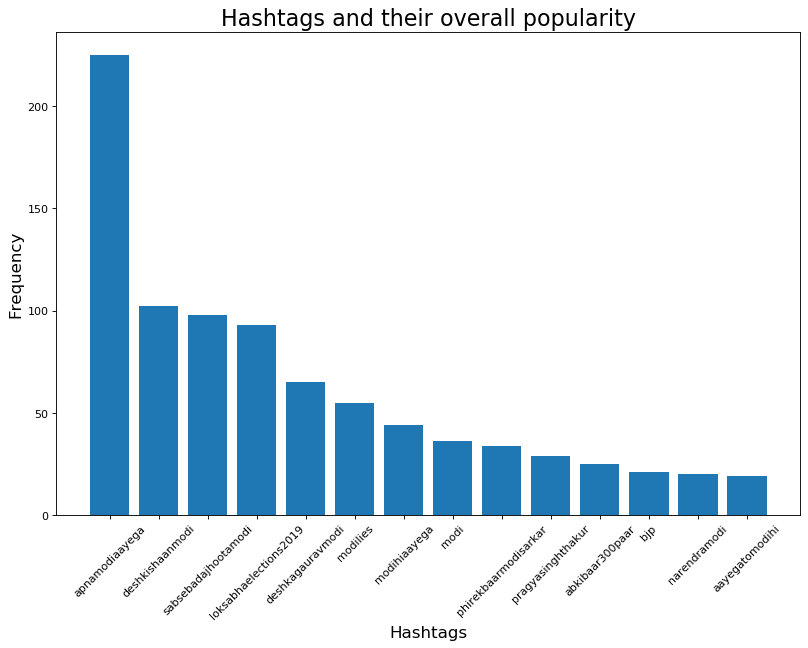

In [31]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# this is for plotting purpose
#index = np.arange(len(x))
plt.bar(hash, freq)
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Hashtags and their overall popularity', fontsize=20)
plt.show()
    

,i,Tags,C1,C2,C3
0,2,#jharkhandbolemodimodi #deshkishaanmodi,opinion,antigovt,sadness
1,3,#sabsebadajhootamodi,opinion,progovt,satisfaction
2,4,#harvotemodiko,general,progovt,surprise
3,5,#deshkishaanmodi,general,neutral,neutral
6,8,#rajivgandhi #insvirat #rahulkabaapchorhai #ra...,opinion,progovt,surprise


In [32]:
len(df[df['1']=='antigovt'])

660

In [34]:
df[df['1']=='antigovt'].to_csv('regex_antigov99.csv')

In [1]:
import pandas as pd
import numpy as np

df1=pd.read_csv("regex_antigov99.csv")
df1.columns=['index','i','Tweet','1','2','3','4','5','6','7','8','9','10','11','12','pt','processed_hashtags','Processed_mentions']        
df1.dropna(inplace=True)
df1.head()

,index,i,Tweet,1,2,3,4,5,6,7,8,9,10,11,12,pt,processed_hashtags,Processed_mentions
18,143,143,vice admiral vinod pasricha dismissed the clai...,antigovt,vice admiral vinod pasricha dismissed claims @...,0.152,0.087,0.760,-0.1779,10,5,6,1,1,0,#rajivgandhi #sabsebadajhootamodi,#rajivgandhi #sabsebadajhootamodi,@narendramodi @narendramodi
24,158,158,narendra modi is 180 degree prime minister @ya...,antigovt,narendra modi 180 degree prime minister @yadav...,0.000,0.000,1.000,0.0000,3,1,1,0,0,1,#indiadecides2019,#indiadecides2019,@yadavakhilesh
39,206,206,#exclusive pm @narendramodi has a grudge agai...,antigovt,# exclusive pm @narendramodi grudge @aamaadm...,0.182,0.055,0.764,-0.5423,10,2,6,0,0,1,#exclusive #electionswithnews18 #loksabhaelect...,#exclusive #electionswithnews18 #loksabhaelect...,@narendramodi @aamaadmiparty @sanjayazadsln @r...
42,210,210,bhot hue mahengayi ki maar nhi chahiye hume ai...,antigovt,bhot hue mahengayi ki maar nhi chahiye hume ai...,0.000,0.000,1.000,0.0000,8,7,4,2,1,0,#mehangipadimodisarkar,#mehangipadimodisarkar,@zeba_yasmeen @gujjar_chhora @kalikaprasad5 @k...
55,248,248,liar @narendramodi #sabsebadajhootamodi,antigovt,liar @narendramodi # sabsebadajhootamodi,0.623,0.000,0.377,-0.5106,2,0,2,0,0,0,#sabsebadajhootamodi,#sabsebadajhootamodi,@narendramodi


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=df1['processed_hashtags'].astype('U')
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:len(df1)])

[('sabsebadajhootamodi', 12), ('modilies', 11), ('armysemaafimaangomodi', 8), ('loksabhaelections2019', 7), ('bjp', 7), ('pragyasinghthakur', 6), ('apnamodiaayega', 5), ('bjpsedemocracybachao', 4), ('pragyathakur', 4), ('rajivgandhi', 3), ('electionswithnews18', 3), ('moditohgaya', 3), ('phirekbaarmodisarkar', 3), ('bjpsupportsterrorists', 3), ('modi', 2), ('elections2019', 2), ('shameonpmmodi', 2), ('mamatadidijaishriram', 2), ('boycottamazon', 2), ('abkibaar300paar', 2), ('electioncommission', 2), ('indiaelections2019', 2), ('bignews', 2), ('bhopal', 2), ('pragyasinghthakurs', 2), ('nathuramgodse', 2), ('nyay', 2), ('abhoganyay', 2), ('indiadecides2019', 1), ('exclusive', 1), ('mehangipadimodisarkar', 1), ('acchedin', 1), ('modiinsviraatattack', 1), ('gaalipolitics', 1), ('electionalert', 1), ('sabsebadajhoothamodi', 1), ('sabsabadajhootamodi', 1), ('live', 1), ('pmrajivjibe', 1), ('rgforpm', 1), ('delhi', 1), ('loksabhaelection2019', 1), ('2019elections', 1), ('electionsoutlook', 1)

In [41]:
hash=[]
freq=[]
count=0
for i,f in words_freq:
    print (i,f)
    count+=1
    if count<15:
        hash.append(i)
        freq.append(f)

sabsebadajhootamodi 12
modilies 11
armysemaafimaangomodi 8
loksabhaelections2019 7
bjp 7
pragyasinghthakur 6
apnamodiaayega 5
bjpsedemocracybachao 4
pragyathakur 4
rajivgandhi 3
electionswithnews18 3
moditohgaya 3
phirekbaarmodisarkar 3
bjpsupportsterrorists 3
modi 2
elections2019 2
shameonpmmodi 2
mamatadidijaishriram 2
boycottamazon 2
abkibaar300paar 2
electioncommission 2
indiaelections2019 2
bignews 2
bhopal 2
pragyasinghthakurs 2
nathuramgodse 2
nyay 2
abhoganyay 2
indiadecides2019 1
exclusive 1
mehangipadimodisarkar 1
acchedin 1
modiinsviraatattack 1
gaalipolitics 1
electionalert 1
sabsebadajhoothamodi 1
sabsabadajhootamodi 1
live 1
pmrajivjibe 1
rgforpm 1
delhi 1
loksabhaelection2019 1
2019elections 1
electionsoutlook 1
elections 1
whokilledrajivg 1
atishiforeastdelhi 1
modikafakegdp 1
modiaanewalahai 1
aayegatomodihi 1
jaihind 1
bjp4india 1
bengalwithbjp 1
amitshah 1
deshkishaanmodi 1
savebengalsavedemocracy 1
justiceforvishnugoswami 1
mohsinkhan 1
yrkkh 1
deshkagauravmodi 1
ma

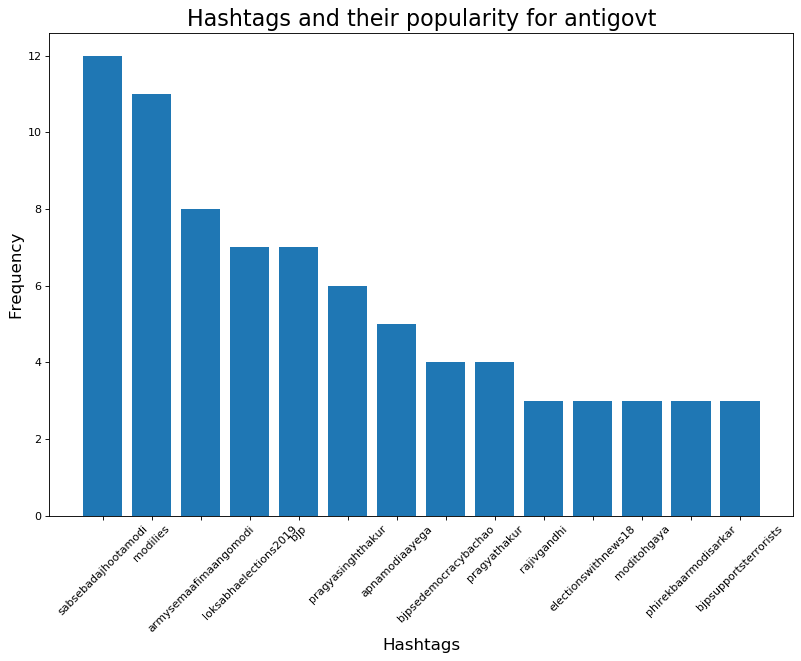

In [42]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# this is for plotting purpose
#index = np.arange(len(x))
plt.bar(hash, freq)
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Hashtags and their popularity for antigovt', fontsize=20)
plt.show()
    

In [43]:
        

#print (df['C2']=='progovt')
df[df['1']=='progovt'].to_csv('regex_progov99.csv')

In [11]:
import pandas as pd
import numpy as np

df2=pd.read_csv("regex_progov99.csv")
df2.columns=['index','i','Tweet','1','2','3','4','5','6','7','8','9','10','11','12','pt','processed_hashtags','Processed_mentions']        
df2.dropna(inplace=True)
df2.head()

,index,i,Tweet,1,2,3,4,5,6,7,8,9,10,11,12,pt,processed_hashtags,Processed_mentions
3,28,28,Today in morning I have voted for PM Sh @naren...,progovt,Today morning I voted PM Sh @narendramodi ji D...,0.000,0.132,0.868,0.4767,6,0,2,4,1,0,#NewIndia,#NewIndia,@narendramodi @CRPaatil @chitraaum @RubikaLiya...
5,31,31,I don\t know who removed #Chowkidar from my Tw...,progovt,I don\t know removed # Chowkidar Twitter handl...,0.000,0.000,1.000,0.0000,3,0,6,0,0,0,#Chowkidar #LokSabhaElections2019 #UditRaj,#Chowkidar #LokSabhaElections2019 #UditRaj,@NewsHtn
17,60,60,@pbhushan1 pranam prashant sir i hadnt voted f...,progovt,@pbhushan1 pranam prashant sir nt voted namo 1...,0.124,0.000,0.876,-0.5267,10,5,6,2,1,2,#modiagain,#modiagain,@pbhushan1 @aamaadmiparty
22,66,66,the sound of the shankh of varanasi from the b...,progovt,sound shankh varanasi banks ganga echoing fart...,0.000,0.313,0.687,0.8074,8,5,4,0,1,0,#modiinvaranasi,#modiinvaranasi,@narendramodi
29,74,74,pm @narendramodi 5 ...,progovt,pm @narendramodi 5 ...,0.000,0.000,1.000,0.0000,2,0,1,0,0,1,#phirekbaarmodisarkaar,#phirekbaarmodisarkaar,@narendramodi


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=df2['processed_hashtags'].astype('U')
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:len(df1)])

[('apnamodiaayega', 74), ('deshkishaanmodi', 39), ('modihiaayega', 20), ('deshkagauravmodi', 19), ('loksabhaelections2019', 18), ('phirekbaarmodisarkar', 14), ('abkibaar300paar', 12), ('namoagain', 9), ('varanasi', 8), ('mamatadidijaishriram', 7), ('savebengalsavedemocracy', 6), ('modijahanvikaswahan', 6), ('modihaitohmumkinhai', 5), ('tmc', 5), ('aayegatohmodihi', 5), ('aayegatomodihi', 4), ('mainbhichowkidar', 4), ('fridayfeeling', 4), ('ayegatohmodihi', 4), ('deshkedilmeimodi', 4), ('apnamodiayega', 4), ('bengalwithbjp', 4), ('newindia', 3), ('kashibolenamonamo', 3), ('bharatkagarvmodi', 3), ('elections2019', 3), ('deshbolemodiphirse', 3), ('hardilmeimodi', 3), ('india', 3), ('___', 3), ('modiaanewalahai', 3), ('pragyasinghthakur', 3), ('westbengal', 3), ('modi', 3), ('rahulgandhi', 3), ('boycottamazon', 3), ('bharat', 3), ('hargharmodi', 3), ('hinduparhamla', 3), ('deshkipasandmodi', 3), ('chowkidar', 2), ('phirekbaarmodisarkaar', 2), ('namofornewindia', 2), ('vote4bjp', 2), ('bhar

In [47]:
hash=[]
freq=[]
count=0
for i,f in words_freq:
    print (i,f)
    count+=1
    if count<15:
        hash.append(i)
        freq.append(f)

apnamodiaayega 74
deshkishaanmodi 39
modihiaayega 20
deshkagauravmodi 19
loksabhaelections2019 18
phirekbaarmodisarkar 14
abkibaar300paar 12
namoagain 9
varanasi 8
mamatadidijaishriram 7
savebengalsavedemocracy 6
modijahanvikaswahan 6
modihaitohmumkinhai 5
tmc 5
aayegatohmodihi 5
aayegatomodihi 4
mainbhichowkidar 4
fridayfeeling 4
ayegatohmodihi 4
deshkedilmeimodi 4
apnamodiayega 4
bengalwithbjp 4
newindia 3
kashibolenamonamo 3
bharatkagarvmodi 3
elections2019 3
deshbolemodiphirse 3
hardilmeimodi 3
india 3
___ 3
modiaanewalahai 3
pragyasinghthakur 3
westbengal 3
modi 3
rahulgandhi 3
boycottamazon 3
bharat 3
hargharmodi 3
hinduparhamla 3
deshkipasandmodi 3
chowkidar 2
phirekbaarmodisarkaar 2
namofornewindia 2
vote4bjp 2
bharatbolenamonamo 2
justmodi 2
delhiwithmodi 2
everyvoteformodi 2
rajasthan 2
thursdaythoughts 2
modiagainsaysindia 2
wednesdaywisdom 2
rahulkachallenge 2
modioncemore 2
modimeinhaidum 2
modilies 2
deshmodikesaath 2
kashimodified 2
kashivotes 2
freetajinderbagga 2
india

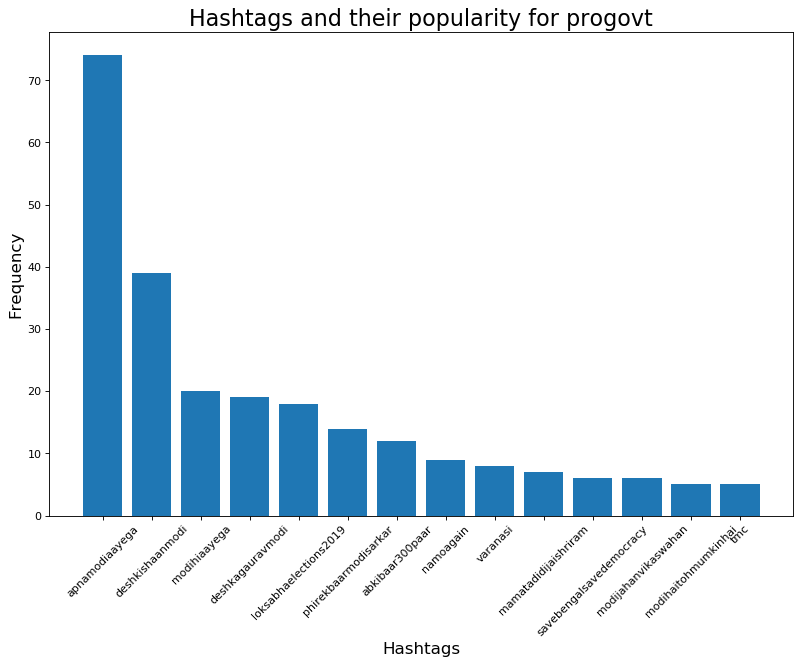

In [48]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# this is for plotting purpose
#index = np.arange(len(x))
plt.bar(hash, freq)
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Hashtags and their popularity for progovt', fontsize=20)
plt.show()
    

In [6]:
import pandas as pd
import numpy as np


file = open("regex_antigov_corpus999.txt","w")   
for i in df1['processed_hashtags']: 
    file.write(i)
    print (i)

#rajivgandhi #sabsebadajhootamodi
#indiadecides2019
#exclusive #electionswithnews18 #loksabhaelections2019
#mehangipadimodisarkar
#sabsebadajhootamodi
#acchedin
#modiinsviraatattack
#gaalipolitics
#electionalert
#sabsebadajhoothamodi
#sabsabadajhootamodi
#modi #moditohgaya
#sabsebadajhootamodi
#live #electionswithnews18 #pmrajivjibe
#sabsebadajhootamodi
#modi
#sabsebadajhootamodi
#sabsebadajhootamodi
#sabsebadajhootamodi
#rgforpm
#sabsebadajhootamodi
#sabsebadajhootamodi
#delhi
#rajivgandhi #loksabhaelection2019 #2019elections
#electionsoutlook #loksabhaelections2019 #elections2019 #elections
#moditohgaya #whokilledrajivg
#rajivgandhi #shameonpmmodi
#sabsebadajhootamodi #shameonpmmodi #loksabhaelections2019
#sabsebadajhootamodi
#atishiforeastdelhi
#loksabhaelections2019
#sabsebadajhootamodi #modikafakegdp #moditohgaya
#modiaanewalahai
#phirekbaarmodisarkar
#aayegatomodihi #jaihind
#mamatadidijaishriram
#bjp4india #bengalwithbjp #bjp #boycottamazon #amitshah #phirekbaarmodisarkar #deshk

In [7]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 

# Reads ‘alice.txt’ file 
sample = open("regex_antigov_corpus999.txt", "r") 
s = sample.read() 


# Replaces escape character with space 
f = s.replace("\n", " ") 

data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 
print (data)
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 

# Print results 
print("Cosine similarity between 'modi' " + "and 'bjp ' - CBOW : ", model1.similarity('modi', 'bjp')) 

print("Cosine similarity between 'modi' " + "and 'bjp' - CBOW : ", model1.similarity('modi', 'bjp')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'modi' " + "and 'bjp' - Skip Gram : ", model2.similarity('modi', 'bjp')) 

print("Cosine similarity between 'modi' " + "and 'bjp' - Skip Gram : ", model2.similarity('modi', 'bjp')) 


[['#', 'rajivgandhi', '#', 'sabsebadajhootamodi', '#', 'indiadecides2019', '#', 'exclusive', '#', 'electionswithnews18', '#', 'loksabhaelections2019', '#', 'mehangipadimodisarkar', '#', 'sabsebadajhootamodi', '#', 'acchedin', '#', 'modiinsviraatattack', '#', 'gaalipolitics', '#', 'electionalert', '#', 'sabsebadajhoothamodi', '#', 'sabsabadajhootamodi', '#', 'modi', '#', 'moditohgaya', '#', 'sabsebadajhootamodi', '#', 'live', '#', 'electionswithnews18', '#', 'pmrajivjibe', '#', 'sabsebadajhootamodi', '#', 'modi', '#', 'sabsebadajhootamodi', '#', 'sabsebadajhootamodi', '#', 'sabsebadajhootamodi', '#', 'rgforpm', '#', 'sabsebadajhootamodi', '#', 'sabsebadajhootamodi', '#', 'delhi', '#', 'rajivgandhi', '#', 'loksabhaelection2019', '#', '2019elections', '#', 'electionsoutlook', '#', 'loksabhaelections2019', '#', 'elections2019', '#', 'elections', '#', 'moditohgaya', '#', 'whokilledrajivg', '#', 'rajivgandhi', '#', 'shameonpmmodi', '#', 'sabsebadajhootamodi', '#', 'shameonpmmodi', '#', 'loks

In [22]:
lista=[]
listb=[]
listc=[]
for i in data:
    for j in i:
        if j!='#':
            #print (j)
            print(f"Cosine similarity between modi and {j} - Skip Gram : ", model1.similarity('modi', j)) 
            print(f"Cosine similarity between modi and {j} - Skip Gram : ", model2.similarity('modi', j)) 
            lista.append('modi')
            listb.append(j)
            listc.append(model2.similarity('modi', j))
for i in range(len(listc)):
    max=listc[0]
    if max<listc[i]:
        max=listc[i]
        pos=i
print (pos)   
print (listc[pos])  
print (f"Maximum similiarity is found in 'modi' and  {listb[i]}")

Cosine similarity between modi and rajivgandhi - Skip Gram :  -0.089984894
Cosine similarity between modi and rajivgandhi - Skip Gram :  0.30515292
Cosine similarity between modi and sabsebadajhootamodi - Skip Gram :  0.062184345
Cosine similarity between modi and sabsebadajhootamodi - Skip Gram :  0.5587572
Cosine similarity between modi and indiadecides2019 - Skip Gram :  0.034485124
Cosine similarity between modi and indiadecides2019 - Skip Gram :  0.3737427
Cosine similarity between modi and exclusive - Skip Gram :  0.06567309
Cosine similarity between modi and exclusive - Skip Gram :  0.3438764
Cosine similarity between modi and electionswithnews18 - Skip Gram :  0.028784921
Cosine similarity between modi and electionswithnews18 - Skip Gram :  0.50157017
Cosine similarity between modi and loksabhaelections2019 - Skip Gram :  -0.07478337
Cosine similarity between modi and loksabhaelections2019 - Skip Gram :  0.52475744
Cosine similarity between modi and mehangipadimodisarkar - Skip

In [15]:
import pandas as pd
import numpy as np

file = open("regex_progov_corpus999.txt","w")   
for i in df2['processed_hashtags']: 
    file.write(i)
    print (i) 


#NewIndia
#Chowkidar #LokSabhaElections2019 #UditRaj
#modiagain
#modiinvaranasi
#phirekbaarmodisarkaar
#bigbraking #kashibolenamonamo #varanasi #namofornewindia
#kashibolenamonamo #varanasi
#gangaaarti #sanatanadharma
#namoagain
#bharatkagarvmodi #aayegatomodihi
#votinground3 #loksabhaelections2019 #namokovotekaro
#loksabhaelections2019 #namoagain #phirekbaarmodisarkar
#newindia #loksabhaelections2019 #vote4bjp
#loksabhaelections2019 #aayegatomodihi #bharatbolenamonamo
#chintamanispeaks #elections2019
#justmodi #modihiaayega #delhiwithmodi
#indiabolemodiphirse
#deshkishaanmodi
#thursdaysthrowback
#baramati #everyvoteformodi
#deshkishaanmodi
#modihiaayega #puriforamritsar
#deshkishaanmodi
#bharatbolenamonamo
#loksabhaelections2019 #deshkishaanmodi #deshkishaanmodi
#modihiaayega
#modihiaayega
#modideshkishaan
#deshkishaanmodi #bjp4ambala
#deshbolemodiphirse
#electionalert
# #abkibaarmodisarkar
#deshkishaanmodi
#hardilmeimodi #shahonnews18
#deshkishaanmodi
#deshkishaanmodi
#chattisgarh #m

In [16]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 

# Reads ‘alice.txt’ file 
sample = open("regex_progov_corpus999.txt", "r") 
s = sample.read() 


# Replaces escape character with space 
f = s.replace("\n", " ") 

data1 = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data1.append(temp) 

print (data1)    

# Create CBOW model 
model3 = gensim.models.Word2Vec(data1, min_count = 1, size = 100, window = 5) 

# Print results 
print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - CBOW : ", model3.similarity('modi', 'loksabhaelections2019')) 

print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - CBOW : ", model3.similarity('modi', 'loksabhaelections2019')) 

# Create Skip Gram model 
model4 = gensim.models.Word2Vec(data1, min_count = 1, size = 100, window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - Skip Gram : ", model4.similarity('modi', 'loksabhaelections2019')) 

print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - Skip Gram : ", model4.similarity('modi', 'loksabhaelections2019')) 

print("Cosine similarity between 'modi' " + "and 'deshkishaanmodi' - CBOW : ", model1.similarity('modi', 'deshkishaanmodi')) 

print("Cosine similarity between 'modi' " + "and 'deshkishaanmodi' - CBOW : ", model1.similarity('modi', 'deshkishaanmodi')) 


[['#', 'newindia', '#', 'chowkidar', '#', 'loksabhaelections2019', '#', 'uditraj', '#', 'modiagain', '#', 'modiinvaranasi', '#', 'phirekbaarmodisarkaar', '#', 'bigbraking', '#', 'kashibolenamonamo', '#', 'varanasi', '#', 'namofornewindia', '#', 'kashibolenamonamo', '#', 'varanasi', '#', 'gangaaarti', '#', 'sanatanadharma', '#', 'namoagain', '#', 'bharatkagarvmodi', '#', 'aayegatomodihi', '#', 'votinground3', '#', 'loksabhaelections2019', '#', 'namokovotekaro', '#', 'loksabhaelections2019', '#', 'namoagain', '#', 'phirekbaarmodisarkar', '#', 'newindia', '#', 'loksabhaelections2019', '#', 'vote4bjp', '#', 'loksabhaelections2019', '#', 'aayegatomodihi', '#', 'bharatbolenamonamo', '#', 'chintamanispeaks', '#', 'elections2019', '#', 'justmodi', '#', 'modihiaayega', '#', 'delhiwithmodi', '#', 'indiabolemodiphirse', '#', 'deshkishaanmodi', '#', 'thursdaysthrowback', '#', 'baramati', '#', 'everyvoteformodi', '#', 'deshkishaanmodi', '#', 'modihiaayega', '#', 'puriforamritsar', '#', 'deshkishaan

In [23]:
lista=[]
listb=[]
listc=[]
for i in data1:
    for j in i:
        if j!='#':
            #print (j)
            print(f"Cosine similarity between modi and {j} - Skip Gram : ", model4.similarity('modi', j)) 
            print(f"Cosine similarity between modi and {j} - Skip Gram : ", model4.similarity('modi', j)) 
            lista.append('modi')
            listb.append(j)
            listc.append(model4.similarity('modi', j))
for i in range(len(listc)):
    max=listc[0]
    if max<listc[i]:
        max=listc[i]
        pos=i
print (pos)   
print (listc[pos])  
print (f"Maximum similiarity is found in 'modi' and  {listb[i]}")


Cosine similarity between modi and newindia - Skip Gram :  0.99782646
Cosine similarity between modi and newindia - Skip Gram :  0.99782646
Cosine similarity between modi and chowkidar - Skip Gram :  0.996698
Cosine similarity between modi and chowkidar - Skip Gram :  0.996698
Cosine similarity between modi and loksabhaelections2019 - Skip Gram :  0.9985082
Cosine similarity between modi and loksabhaelections2019 - Skip Gram :  0.9985082
Cosine similarity between modi and uditraj - Skip Gram :  0.98298514
Cosine similarity between modi and uditraj - Skip Gram :  0.98298514
Cosine similarity between modi and modiagain - Skip Gram :  0.9920824
Cosine similarity between modi and modiagain - Skip Gram :  0.9920824
Cosine similarity between modi and modiinvaranasi - Skip Gram :  0.9910149
Cosine similarity between modi and modiinvaranasi - Skip Gram :  0.9910149
Cosine similarity between modi and phirekbaarmodisarkaar - Skip Gram :  0.99719656
Cosine similarity between modi and phirekbaarmo

In [18]:
print(f"Cosine similarity between modi  and {j} - Skip Gram : ", model4.similarity('modi', j)) 

print(f"Cosine similarity between modi and {j} - Skip Gram : ", model4.similarity('modi', j)) 


Cosine similarity between modi  and apnamodiaayega - Skip Gram :  0.9985991
Cosine similarity between modi and apnamodiaayega - Skip Gram :  0.9985991


In [29]:
df.to_csv('regex_general_data999.csv')

In [32]:
df

,i,Tweet,1,2,3,4,5,6,7,8,9,10,11,12,Processed_mentions,processed_hashtags
0,0,#MavalLokSabha #_ #loksabha\n#ParthForMaval #...,neutral,# MavalLokSabha # _ # loksabha\n#ParthForMav...,0.000,0.000,1.000,0.0000,1,1,1,0,0,0,,#MavalLokSabha #_ #loksabha\n#ParthForMaval #V...
1,1,# # #Loksabha Election Pune,neutral,# # # Loksabha Election Pune,0.000,0.000,1.000,0.0000,2,0,0,0,0,0,,# # #Loksabha
2,2,\n#MavalLokSabha #_ #loksabha\n#ParthForMaval...,neutral,\n#MavalLokSabha # _ # loksabha\n#ParthForMa...,0.000,0.000,1.000,0.0000,3,0,0,0,0,0,,#_ #loksabha\n#ParthForMaval #VotingRound3 #Vo...
3,3,3 UP \n#Thirdphaseofvoting #NarendraM...,neutral,3 UP \n#Thirdphaseofvoting # Narend...,0.000,0.000,1.000,0.0000,0,0,1,0,0,0,,#NarendraModi #BJP #Congress
4,4,Mat Bhool\n#loksabha elections\n#baramatiloksa...,neutral,Mat Bhool\n#loksabha elections\n#baramatiloksa...,0.000,0.000,1.000,0.0000,3,2,1,0,0,0,,
5,5,#AAP #LokSabha candidate from North East #Delh...,neutral,# AAP # LokSabha candidate North East # Delhi ...,0.000,0.000,1.000,0.0000,3,0,3,0,0,1,@ANINDYAtimes,#AAP #LokSabha #Delhi #LokSabhaElections2019 #...
6,6,\n \n#LokSabhaElections2019,neutral,\n \n#LokSabhaElections2019,0.000,0.000,1.000,0.0000,0,0,1,0,0,0,,
7,7,350 EVM \n\n \n\n@BJP4...,antigovt,350 EVM \n\n \n\n@B...,0.000,0.000,1.000,0.0000,1,0,1,1,0,1,@BJPsoldIndia @ECISVEEP @SanjayAzadSln @RahulG...,
8,8,Hahahaha Congress leaders dont trust even thei...,progovt,Hahahaha Congress leaders nt trust families vo...,0.000,0.320,0.680,0.5106,2,0,2,0,1,0,,
9,9,#ElectionsWithPK \n 3 \n\n#AbkiBaarKiskiS...,neutral,# ElectionsWithPK \n 3 \n\n#AbkiBaarKisk...,0.000,0.000,1.000,0.0000,2,0,0,0,0,1,,#ElectionsWithPK #LokSabhaElections2019


In [33]:
import pandas as pd
import numpy as np

file = open("regex_gen_corpus999.txt","w")   
for i in df['processed_hashtags']: 
    file.write(i)
    print (i) 


#MavalLokSabha #_ #loksabha\n#ParthForMaval #VotingRound3 #VoteKar
# # #Loksabha
#_ #loksabha\n#ParthForMaval #VotingRound3 #VoteKar
#NarendraModi #BJP #Congress

#AAP #LokSabha #Delhi #LokSabhaElections2019 #SignatureBridge\nPhoto



#ElectionsWithPK #LokSabhaElections2019
#Votinground3 #BattleOf2019 #Phase3 #Trivandrum #Kerala
#Bhopal #VotingRound3 #Phase3

#LokSabhaElections2019 #Phase3 #VotingRound3
#PhirEkBaarModiSarkar

#Delhi #LokSabhaElections2019
#GetInked #LokSabhaElections2019

#
#Odisha

#LokSabhaElections2019
#

#LokSabhaElections2019
#Phase3 #LokSabhaElections2019\n #ReporterDiary
#LokSabhaElections2019 #OdishaElections2019
#NewIndia
#VoteKar #LokSabhaElections2019 #AayegaToModiHi
#VoteKar
#Chowkidar #LokSabhaElections2019 #UditRaj
#Gujarat\nPatan #GujaratElections2019 #TV9News
#LokSabhaElections2019
#AayegaToModiHi #LokSabhaElections2019\nToday

#LokSabhaElections2019
#LokSabhaElections2019 #NaMoForNewIndia #___ #___
#Voting #Democracy #VotingRound3 #LokSabhaElections201

In [34]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 

# Reads ‘alice.txt’ file 
sample = open("regex_gen_corpus999.txt", "r") 
s = sample.read() 


# Replaces escape character with space 
f = s.replace("\n", " ") 

data5 = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data5.append(temp) 

print (data5)    

# Create CBOW model 
model5 = gensim.models.Word2Vec(data5, min_count = 1, size = 100, window = 5) 

# Print results 
print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - CBOW : ", model5.similarity('modi', 'loksabhaelections2019')) 

print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - CBOW : ", model5.similarity('modi', 'loksabhaelections2019')) 

# Create Skip Gram model 
model6 = gensim.models.Word2Vec(data5, min_count = 1, size = 100, window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - Skip Gram : ", model6.similarity('modi', 'loksabhaelections2019')) 

print("Cosine similarity between 'modi' " + "and 'loksabhaelections2019' - Skip Gram : ", model6.similarity('modi', 'loksabhaelections2019')) 

print("Cosine similarity between 'modi' " + "and 'deshkishaanmodi' - CBOW : ", model6.similarity('modi', 'deshkishaanmodi')) 

print("Cosine similarity between 'modi' " + "and 'deshkishaanmodi' - CBOW : ", model6.similarity('modi', 'deshkishaanmodi')) 


[['#', 'mavalloksabha', '#', '_', '#', 'loksabha\\n', '#', 'parthformaval', '#', 'votinground3', '#', 'votekar', '#', '#', '#', 'loksabha', '#', '_', '#', 'loksabha\\n', '#', 'parthformaval', '#', 'votinground3', '#', 'votekar', '#', 'narendramodi', '#', 'bjp', '#', 'congress', '#', 'aap', '#', 'loksabha', '#', 'delhi', '#', 'loksabhaelections2019', '#', 'signaturebridge\\nphoto', '#', 'electionswithpk', '#', 'loksabhaelections2019', '#', 'votinground3', '#', 'battleof2019', '#', 'phase3', '#', 'trivandrum', '#', 'kerala', '#', 'bhopal', '#', 'votinground3', '#', 'phase3', '#', 'loksabhaelections2019', '#', 'phase3', '#', 'votinground3', '#', 'phirekbaarmodisarkar', '#', 'delhi', '#', 'loksabhaelections2019', '#', 'getinked', '#', 'loksabhaelections2019', '#', '#', 'odisha', '#', 'loksabhaelections2019', '#', '#', 'loksabhaelections2019', '#', 'phase3', '#', 'loksabhaelections2019\\n', '#', 'reporterdiary', '#', 'loksabhaelections2019', '#', 'odishaelections2019', '#', 'newindia', '#',

In [35]:
lista=[]
listb=[]
listc=[]
for i in data1:
    for j in i:
        if j!='#':
            #print (j)
            print(f"Cosine similarity between modi and {j} - Skip Gram : ", model6.similarity('modi', j)) 
            print(f"Cosine similarity between modi and {j} - Skip Gram : ", model6.similarity('modi', j)) 
            lista.append('modi')
            listb.append(j)
            listc.append(model6.similarity('modi', j))
for i in range(len(listc)):
    max=listc[0]
    if max<listc[i]:
        max=listc[i]
        pos=i
print (pos)   
print (listc[pos])  
print (f"Maximum similiarity is found in 'modi' and  {listb[i]}")

Cosine similarity between modi and newindia - Skip Gram :  0.99924225
Cosine similarity between modi and newindia - Skip Gram :  0.99924225
Cosine similarity between modi and chowkidar - Skip Gram :  0.998828
Cosine similarity between modi and chowkidar - Skip Gram :  0.998828
Cosine similarity between modi and loksabhaelections2019 - Skip Gram :  0.9992815
Cosine similarity between modi and loksabhaelections2019 - Skip Gram :  0.9992815
Cosine similarity between modi and uditraj - Skip Gram :  0.99605715
Cosine similarity between modi and uditraj - Skip Gram :  0.99605715
Cosine similarity between modi and modiagain - Skip Gram :  0.9991403
Cosine similarity between modi and modiagain - Skip Gram :  0.9991403
Cosine similarity between modi and modiinvaranasi - Skip Gram :  0.9988463
Cosine similarity between modi and modiinvaranasi - Skip Gram :  0.9988463
Cosine similarity between modi and phirekbaarmodisarkaar - Skip Gram :  0.99933064
Cosine similarity between modi and phirekbaarmo

KeyError: "word '77varanasiachievements' not in vocabulary"